### Load tensorflow

In [1]:
import warnings
warnings.filterwarnings('ignore')
#!pip3 install -U tensorflow --quiet
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Dense, BatchNormalization, LeakyReLU, Reshape

In [2]:
import tensorflow as tf
# ?tf.set_random_seed(42)

### Collect Data

In [3]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [4]:
trainX.shape, testX.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
testX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
testY[0]

7

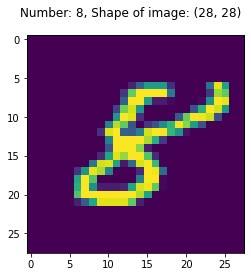

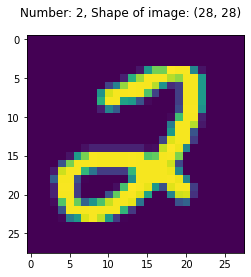

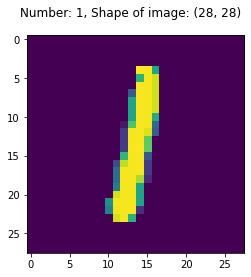

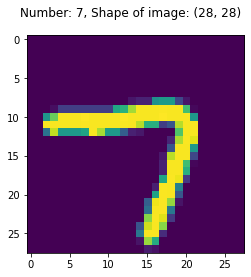

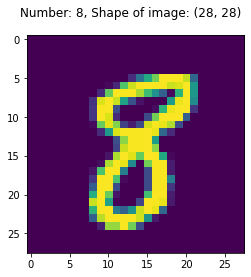

In [7]:
#Let's review the data in original form
for i in range(5):
    img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
    plt.imshow(testX[img_num]) #Show the image from test dataset
    plt.suptitle('Number: ' + str(testY[img_num]) + ', Shape of image: ' + str(testX[img_num].shape))
    plt.show()

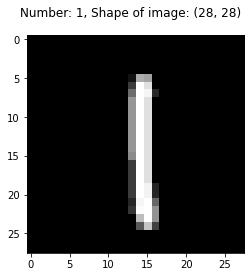

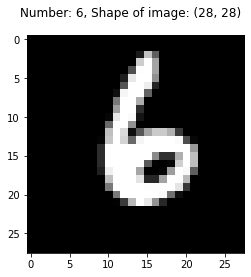

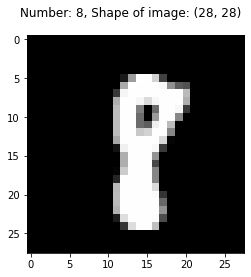

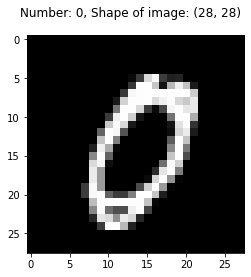

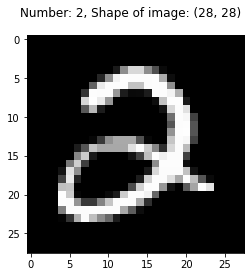

In [8]:
for i in range(5):
    img_num = np.random.randint(0, testX.shape[0]) #Get a random integer between 0 and number of examples in test dataset
    plt.imshow(testX[img_num], cmap='gray')                      #Show the image from test dataset
    plt.suptitle('Number: ' + str(testY[img_num]) + ', Shape of image: ' + str(testX[img_num].shape))
    plt.show()

### Convert Output label to multiple values

In [9]:
testY[0]

7

In [10]:
# changing the target variables to categorical
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Nornalize the input

In [12]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
trainX = trainX/255.0
testX = testX/255.0

## Build the Graph...

In [15]:
# Clear the existing model in memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add 1st hidden layer
model.add(tf.keras.layers.BatchNormalization(                         #Normalize the data
                                            axis=-1,
                                            momentum=0.99,
                                            epsilon=0.001,
                                            center=True,
                                            scale=True,
                                            beta_initializer="zeros",
                                            gamma_initializer="ones",
                                            moving_mean_initializer="zeros",
                                            moving_variance_initializer="ones",
                                            beta_regularizer=None,
                                            gamma_regularizer=None,
                                            beta_constraint=None,
                                            gamma_constraint=None
                                           )
         )
# model.add(tf.keras.layers.Dense(200, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l1_l2()))
model.add(tf.keras.layers.Dense(
                                units=800,
                                activation=None,
                                use_bias=True,
                                kernel_initializer="glorot_uniform",
                                bias_initializer="zeros",
                                kernel_regularizer=None,
                                bias_regularizer=None,
                                activity_regularizer=None,
                                kernel_constraint=None,
                                bias_constraint=None
                               )
         ) 
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.Dropout(rate=0.2))

#Add 2nd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(400, kernel_initializer='he_uniform', activation='relu'))
#model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

#Add 3rd hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200, kernel_initializer='he_uniform', activation='relu'))
#model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

#Add 4th hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, kernel_initializer='he_uniform', activation='relu'))
#model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))

#Add 5th hidden layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(30, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.1))

#Add OUTPUT layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, kernel_initializer='he_uniform', activation='softmax'))

## Compile the Model

In [16]:
nadam_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam") #adam with nestrov

#Compile the model
model.compile(optimizer=nadam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'], loss_weights=None, weighted_metrics=None,
              run_eagerly=None, steps_per_execution=None)

### Visualizing model training

In [17]:
#%load_ext tensorboard
%load_ext tensorboard

#startting tensorboard
%tensorboard --logdir ./tmp

## Train the model

In [ ]:
# Callbacks are used to save the best model during the training, callbacks are functions which can be called during model training
#model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_v1.h5', save_best_only=True, monitor='val_loss', mode='auto', verbose=1)

model_callbacks = [tf.keras.callbacks.ModelCheckpoint('./tmp/v7/mnist.h5',
                                                       monitor= 'val_accuracy',
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       mode='auto',
                                                       verbose=1),
                   tf.keras.callbacks.TensorBoard(log_dir='./tmp/v7',
                                                  histogram_freq=1,
                                                  embeddings_freq=1
                                                 )
                  ]

model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=32,
          callbacks=[model_callbacks],
          shuffle=True,
          use_multiprocessing=True)

Epoch 1/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4009 - accuracy: 0.8812 - val_loss: 0.1193 - val_accuracy: 0.9632

Epoch 00001: val_accuracy improved from -inf to 0.96320, saving model to ./tmp/v7\mnist.h5
Epoch 2/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2296 - accuracy: 0.9319 - val_loss: 0.1354 - val_accuracy: 0.9586

Epoch 00002: val_accuracy did not improve from 0.96320
Epoch 3/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1878 - accuracy: 0.9446 - val_loss: 0.1003 - val_accuracy: 0.9669

Epoch 00003: val_accuracy improved from 0.96320 to 0.96690, saving model to ./tmp/v7\mnist.h5
Epoch 4/100
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1625 - accuracy: 0.9525 - val_loss: 0.0798 - val_accuracy: 0.9755

Epoch 00004: val_accuracy improved from 0.96690 to 0.97550, saving model to ./tmp/v7\mnist.h5
Epoch 5/100
1875/1875 [==============================] - 25s 13ms/step - l

### Saving the best model

In [ ]:
model.save('./model/mnist_dnn.h5', include_optimizer=False)

In [ ]:
model = tf.keras.models.load_model('./model/mnist_dnn.h5')

## Model Prediction

In [ ]:
model.summary()     # non trainable are those which are not updated by gradient descent, normally from batchnorm

In [43]:
#model.get_weights()

In [ ]:
model.input

In [ ]:
testX[0:5].shape

In [ ]:
import numpy as np

In [ ]:
testX[0].shape

In [ ]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

In [ ]:
pred = model.predict(input_data)
pred

In [ ]:
pred.shape

In [ ]:
pred[0]

In [ ]:
np.argmax(pred[0])

In [ ]:
#Lets print the image as well
plt.imshow(testX[0],cmap='gray');